<a href="https://colab.research.google.com/github/poolGolez/tf-playground/blob/main/exercises/%5Bregression%5D_habitability.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Habitability

# Habitability

📗 **Dataset Source**: [Kaggle](https://www.kaggle.com/datasets/ifteshanajnin/get-a-room-ml-hackathon-by-hackerearth)

## Ingest

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive

drive.mount('/gdrive')

Mounted at /gdrive


In [3]:
FILE_LOCATION = '/gdrive/My Drive/Me/Learning/TensorFlow Developer Certificate: Zero to Mastery/data/habitability/train.csv'

df = pd.read_csv(FILE_LOCATION)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39499 entries, 0 to 39498
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Property_ID             39499 non-null  object 
 1   Property_Type           39499 non-null  object 
 2   Property_Area           39499 non-null  int64  
 3   Number_of_Windows       37845 non-null  float64
 4   Number_of_Doors         39499 non-null  int64  
 5   Furnishing              38457 non-null  object 
 6   Frequency_of_Powercuts  38116 non-null  float64
 7   Power_Backup            39499 non-null  object 
 8   Water_Supply            39499 non-null  object 
 9   Traffic_Density_Score   39499 non-null  float64
 10  Crime_Rate              38712 non-null  object 
 11  Dust_and_Noise          38280 non-null  object 
 12  Air_Quality_Index       39499 non-null  float64
 13  Neighborhood_Review     39499 non-null  float64
 14  Habitability_score      39499 non-null

## Exploratory Data Analysis

### Exploring the categorical attributes

**The Categorical Columns**
* ***Property_ID*** - unique identifier of the property
* ***Property_Type*** - type of the property (*Apartment*, *Bungalow*, etc.)
* ***Furnishing*** - type of furnishing (*Fully Furnished*, *Semi-Furnished*, or *Unfurnished*)
* ***Power_Backup*** - availability of power backup
* ***Water_Supply*** - avaialbility of water supply (*All the time*, *Once in a day - Morning*, *Once in a day - Evening*, and *Once in two days*)
* ***Crime_Rate*** - crime rate in the neighborhood (*Well below average*, *Slightly below average*, *Slightly above average*, and *Well above average*)
* ***Dust_and_Noise*** - quantity of dust and noise in the neighborhood (*High*, *Medium*, and *Low*)

In [4]:
categorical_df = df.select_dtypes(include=['object'])
categorical_df.columns

Index(['Property_ID', 'Property_Type', 'Furnishing', 'Power_Backup',
       'Water_Supply', 'Crime_Rate', 'Dust_and_Noise'],
      dtype='object')

The possible values of the categorical columns, except for the ***Property_ID***:
* ***Property_Type***: `Apartment`, `Bungalow`, `Single-family home` `Duplex`, `#R%$G&867`, and `Container Home`
* ***Furnishing***: `Semi_Furnished`, `Unfurnished`, and `Fully Furnished`
* ***Power_Backup***: `No`, `Yes`, and `NOT MENTIONED`
* ***Water_Supply***: `Once in a day - Morning`, `Once in a day - Evening`, `All time`, `NOT MENTIONED`, and `Once in two days`
* ***Crime_Rate***: `Slightly below average`, `Well below average`, `Well above average`, and `Slightly above average`
* ***Dust_and_Noise***: `Medium`, `High`, and `Low`

In [5]:
for col_name in categorical_df.columns.drop('Property_ID'):
  print(f"{col_name}: {categorical_df[col_name].unique()}")

Property_Type: ['Apartment' 'Bungalow' 'Single-family home' 'Duplex' '#R%$G&867'
 'Container Home']
Furnishing: ['Semi_Furnished' 'Unfurnished' 'Fully Furnished' nan]
Power_Backup: ['No' 'Yes' 'NOT MENTIONED']
Water_Supply: ['Once in a day - Morning' 'Once in a day - Evening' 'All time'
 'NOT MENTIONED' 'Once in two days']
Crime_Rate: ['Slightly below average' 'Well below average' 'Well above average' nan
 'Slightly above average']
Dust_and_Noise: ['Medium' nan 'High' 'Low']


### Exploring the numeric attributes

**The Numeric Columns**
* ***Property_Area*** - area of the property in $feet^2$
* ***Number_of_Windows*** - number of windows avaialable in the property
* ***Number_of_Doors*** - number of doors available in the property
* ***Frequency_of_Powercuts*** - average number of power cuts per week
* ***Traffic_Density_Score*** - represents the density of traffic on a scale of $1$ to $10$
* ***Air_Quality_Index*** - see [Wikipedia](https://en.wikipedia.org/wiki/Air_quality_index#United_States) for explanation (can be > 1000)
* ***Neighborhood_Review*** - average ratings given to the neighborhood by the people ranging from $1$ (*lowest*) to $5$ (*highest*)
* ⭐ ***Habitability_Score*** - the score of the property ranging from $0$ to $100$

In [6]:
numeric_df = df.select_dtypes(include=['float64', 'int64'])
print(f"Numeric Columns: {list(numeric_df.columns)}")

Numeric Columns: ['Property_Area', 'Number_of_Windows', 'Number_of_Doors', 'Frequency_of_Powercuts', 'Traffic_Density_Score', 'Air_Quality_Index', 'Neighborhood_Review', 'Habitability_score']


In [7]:
df.describe()

,Property_Area,Number_of_Windows,Number_of_Doors,Frequency_of_Powercuts,Traffic_Density_Score,Air_Quality_Index,Neighborhood_Review,Habitability_score
count,39499.000000,37845.000000,39499.000000,38116.000000,39499.000000,39499.000000,39499.000000,39499.000000
mean,1391.715638,3.923768,2.331375,0.484678,6.354772,121.352566,3.735945,73.482297
std,1953.287544,2.690992,1.179964,0.752207,1.219681,62.384669,0.796843,14.118753
min,100.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,7.280000
25%,494.000000,2.000000,1.000000,0.000000,5.600000,95.000000,3.220000,69.660000
50%,932.000000,4.000000,2.000000,0.000000,6.470000,113.000000,3.850000,75.760000
75%,1770.000000,5.000000,3.000000,1.000000,7.220000,140.000000,4.260000,82.260000
max,28064.000000,15.000000,6.000000,3.000000,9.910000,1044.000000,5.000000,100.000000


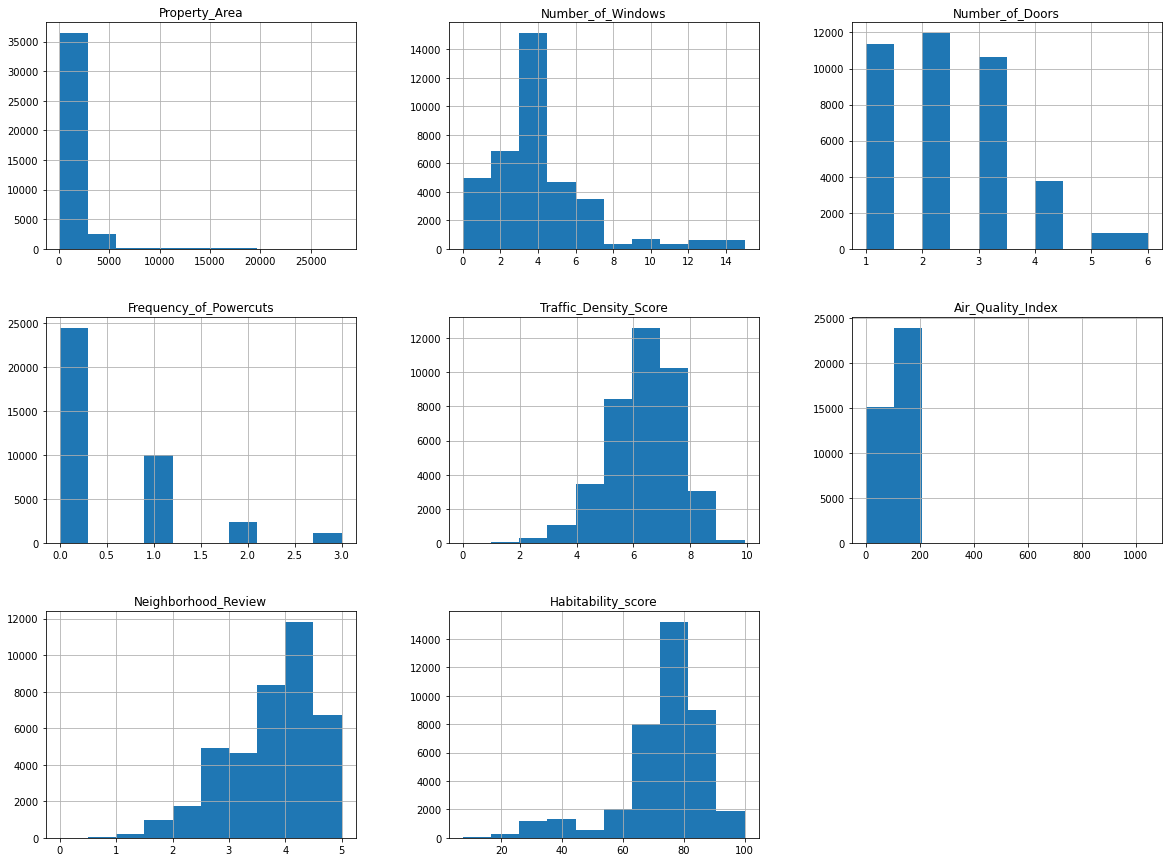

In [8]:
df.hist(figsize=(20,15))
plt.show()

### Data Correlation

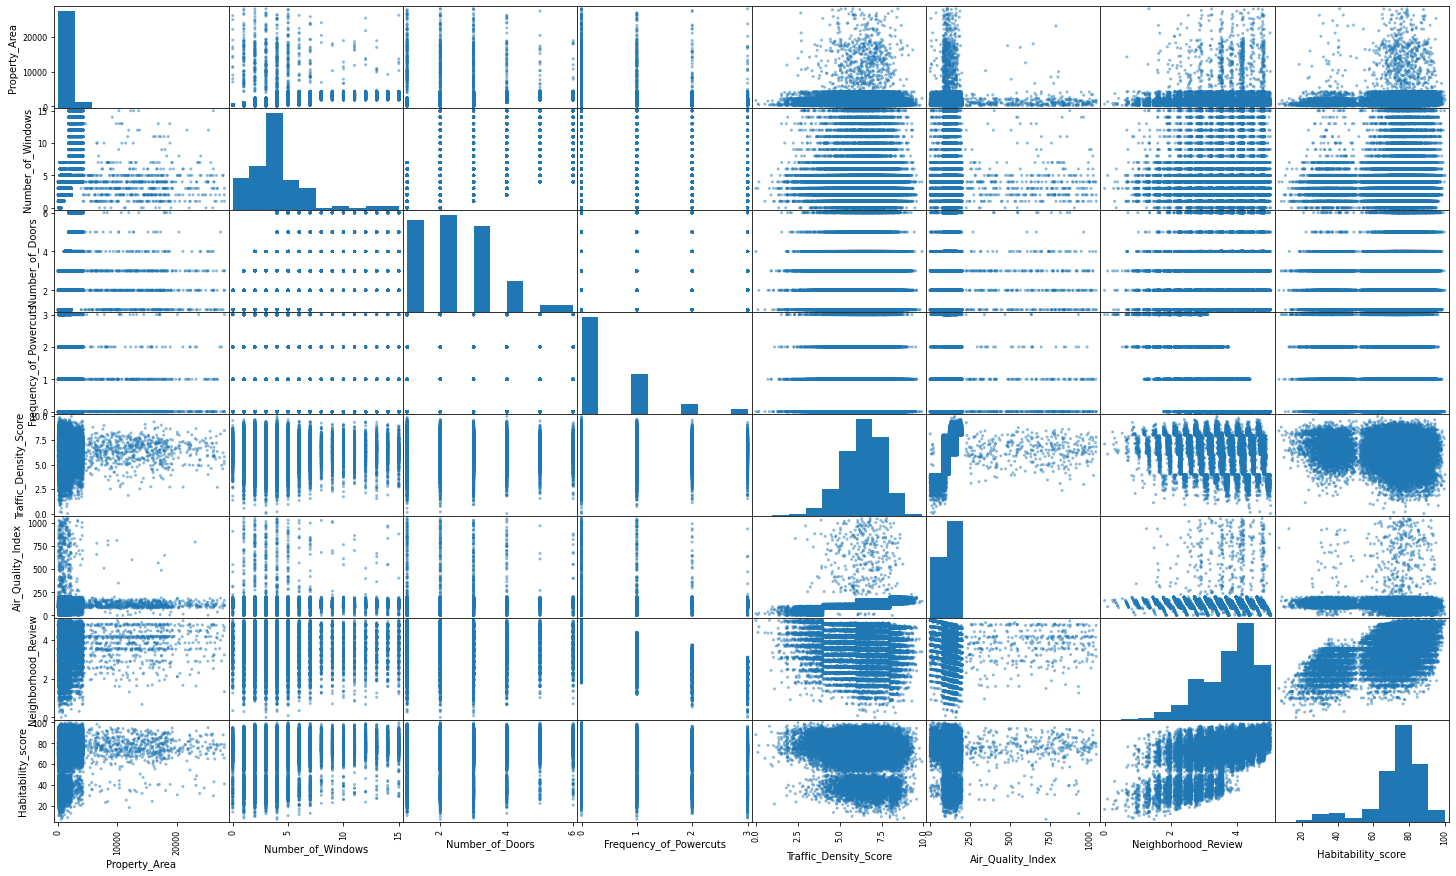

In [11]:
from pandas.plotting import scatter_matrix

scatter_matrix(numeric_df, figsize=(25,15))
plt.show()

In [14]:
numeric_df

Habitability_score        1.000000
Neighborhood_Review       0.540033
Number_of_Windows         0.094640
Number_of_Doors           0.072108
Property_Area             0.065079
Air_Quality_Index        -0.042233
Traffic_Density_Score    -0.070289
Frequency_of_Powercuts   -0.234487
Name: Habitability_score, dtype: float64

🔍 From the correlation matrix above, we find that:
* ***Neighborhood_Review*** has a significant **positive correlation** with the ***Habitability_score***
* ***Frequency_of_Powercuts*** has a significant **negative correlation with the ***Habitability_score***

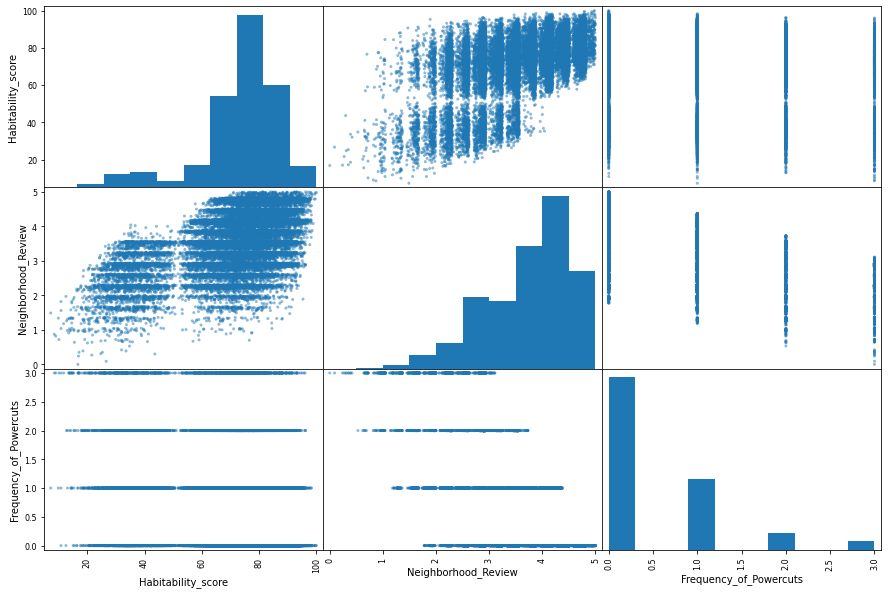

In [22]:
scatter_matrix(numeric_df[['Habitability_score', 'Neighborhood_Review', 'Frequency_of_Powercuts']], figsize=(15, 10))
plt.show()

## Data Cleaning

### Missing Values

In [10]:
df.isna().sum()

Property_ID                  0
Property_Type                0
Property_Area                0
Number_of_Windows         1654
Number_of_Doors              0
Furnishing                1042
Frequency_of_Powercuts    1383
Power_Backup                 0
Water_Supply                 0
Traffic_Density_Score        0
Crime_Rate                 787
Dust_and_Noise            1219
Air_Quality_Index            0
Neighborhood_Review          0
Habitability_score           0
dtype: int64

#### Number of Windows (1,654 values; 4.19%)

count    37845.000000
mean         3.923768
std          2.690992
min          0.000000
25%          2.000000
50%          4.000000
75%          5.000000
max         15.000000
Name: Number_of_Windows, dtype: float64
Missing data(%): 4.18744778348819%


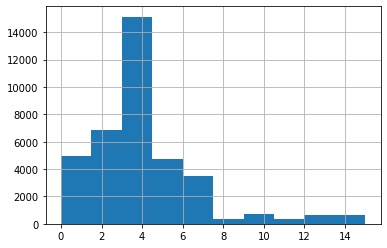

In [31]:
df['Number_of_Windows'].hist()

print(df['Number_of_Windows'].describe())
print(f"Missing values (%): {df['Number_of_Windows'].isna().sum()/len(df) * 100}%")

🛠 We can use the median to fill in the missing values for ***Number_of_Windows***.

#### Furnishing (1,042 missing; 2.64%)

count              38457
unique                 3
top       Semi_Furnished
freq               20357
Name: Furnishing, dtype: object
Missing values (%): 2.6380414694042886%


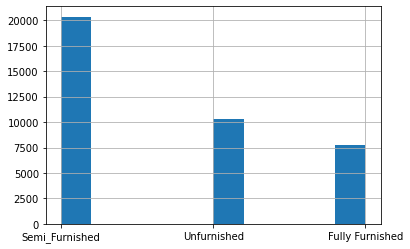

In [40]:
df['Furnishing'].hist()

print(df['Furnishing'].describe())
print(f"Missing values (%): {df['Furnishing'].isna().sum()/len(df) * 100}%")

🛠 As ***Furnishing*** is categorical, we can introduce another value `NOT MENTIONED` (just with the other categorical values) on the missing values.

#### Frequency of Powercuts (1,383 missing; 3.5%)

count    38116.000000
mean         0.484678
std          0.752207
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          3.000000
Name: Frequency_of_Powercuts, dtype: float64
Missing values (%): 3.5013544646699915%


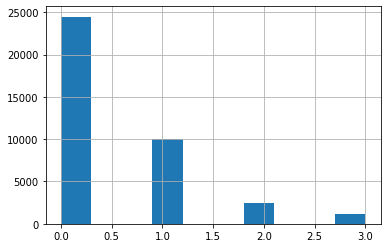

In [41]:
df['Frequency_of_Powercuts'].hist()

print(df['Frequency_of_Powercuts'].describe())
print(f"Missing values (%): {df['Frequency_of_Powercuts'].isna().sum()/len(df) * 100}%")

#### Crime Rate (787 missing; 1.99%)

count                  38712
unique                     4
top       Well below average
freq                   19472
Name: Crime_Rate, dtype: object
Missing values (%): 1.9924555052026633%


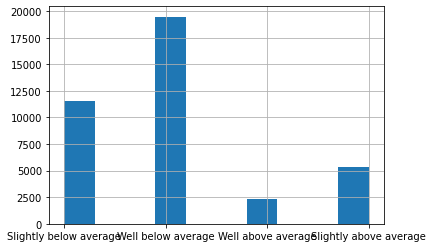

In [42]:
df['Crime_Rate'].hist()

print(df['Crime_Rate'].describe())
print(f"Missing values (%): {df['Crime_Rate'].isna().sum()/len(df) * 100}%")

🛠 We introduce another value `NOT MENTIONED`on the missing values.

#### Dust and Noise (1,219 missing; xx%)

count      38280
unique         3
top       Medium
freq       32996
Name: Dust_and_Noise, dtype: object
Missing values (%): 3.0861540798501226%


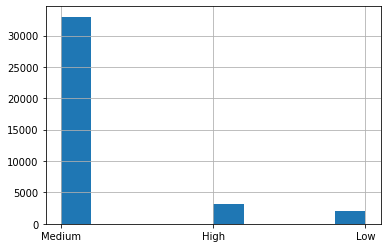

In [44]:
df['Dust_and_Noise'].hist()

print(df['Dust_and_Noise'].describe())
print(f"Missing values (%): {df['Dust_and_Noise'].isna().sum()/len(df) * 100}%")

🛠 We introduce the `NOT_MENTIONED` value to fill in the missing values for ***Dust_and_Noise***.

#### 🛠 **Action Items**
As the number of missing values are not that significant - not going over $5\%$ - we fill in those missing values as follows:
* ***Number_of_Windows*** - *median* of the existing values
* ***Furnishing*** - the string value `NOT_MENTIONED`
* ***Crime_Rate*** - the string value `NOT_MENTIONED`
* ***Dust_and_Noise*** - the string value `NOT_MENTIONED`

In [46]:
"""
TODO: Create imputer to fill in the missing values
"""

'\nTODO: Create imputer to fill in the missing values\n'

In [ ]:
x = df[['Number_of_Windows']]